<a href="https://colab.research.google.com/github/ChengYao0209/ALdea_milk/blob/main/%E7%89%9B%E7%89%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!unzip -uq /content/drive/MyDrive/DataScience/台灣牧場乳量預測/data.zip -d /content/

In [5]:
birth=pd.read_csv("birth.csv",sep=",")
breed=pd.read_csv("breed.csv",sep=",")
report=pd.read_csv("report.csv",sep=",")
spec=pd.read_csv("spec.csv",sep=",")
sub=pd.read_csv("submission.csv",sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print("The shape of birth : ",birth.shape)
print("The shape of breed : ",breed.shape)
print("The shape of report : ",report.shape)
print("The shape of spec : ",spec.shape)

The shape of birth :  (3761, 13)
The shape of breed :  (21050, 8)
The shape of report :  (37517, 21)
The shape of spec :  (4362, 7)


In [7]:
report.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
5,6,2013,8,A,52612,507H7173,96040545,2011/1/1 00:00,1,239.0,...,2013/1/1 00:00,2013/8/28 00:00,31,2013/8/29 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
6,7,2013,10,A,52612,507H7173,96040545,2011/1/1 00:00,1,281.0,...,2013/1/1 00:00,2013/10/9 00:00,33,2013/10/11 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
7,8,2013,11,A,52612,507H7173,96040545,2011/1/1 00:00,1,311.0,...,2013/1/1 00:00,2013/11/8 00:00,34,2013/11/12 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
8,9,2013,12,A,52612,507H7173,96040545,2011/1/1 00:00,1,337.0,...,2013/1/1 00:00,2013/12/4 00:00,35,2013/12/5 00:00,2015/5/5 00:00,507H11621,3,NaN,2013/3/5 00:00,501H8784
9,10,2014,1,A,52612,507H7173,96040545,2011/1/1 00:00,1,370.0,...,2013/1/1 00:00,2014/1/6 00:00,36,2014/1/8 00:00,2015/5/5 00:00,507H11621,4,NaN,2013/3/5 00:00,501H8784


In [8]:
sub_data = pd.DataFrame(columns=report.columns)
idx = 0
for i in report['1']:
  for j in sub['ID']:
    if i == j:
      for c in sub_data.columns:
        sub_data.loc[idx, str(c)] = report[str(c)][i-1]
      idx = idx + 1
sub_data.head(10)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,480,2019,1,A,52631,501H9952,97040152,2011/3/17 00:00,4,435.0,...,2017/11/1 00:00,2019/1/10 00:00,94,2019/1/15 00:00,2019/2/3 00:00,551HO00657,6,2016/8/4 00:00,2018/1/6 00:00,614HO07276
1,742,2019,2,A,52640,501H9952,96040567,2011/4/1 00:00,4,13.0,...,2019/1/29 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2019/2/28 00:00,551HO00695,0,2017/6/17 00:00,2019/2/28 00:00,551HO00695
2,743,2019,3,A,52640,501H9952,96040567,2011/4/1 00:00,4,35.0,...,2019/1/29 00:00,2019/3/5 00:00,95,2019/3/6 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
3,744,2019,4,A,52640,501H9952,96040567,2011/4/1 00:00,4,70.0,...,2019/1/29 00:00,2019/4/9 00:00,96,2019/4/11 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
4,745,2019,5,A,52640,501H9952,96040567,2011/4/1 00:00,4,98.0,...,2019/1/29 00:00,2019/5/7 00:00,97,2019/5/9 00:00,2019/2/28 00:00,551HO00695,1,2017/6/17 00:00,2019/2/28 00:00,551HO00695
5,793,2019,2,A,52641,614H5010,97040119,2011/4/2 00:00,6,279.0,...,2018/5/8 00:00,2019/2/11 00:00,94,2019/2/12 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
6,794,2019,1,A,52641,614H5010,97040119,2011/4/2 00:00,6,247.0,...,2018/5/8 00:00,2019/1/10 00:00,93,2019/1/15 00:00,2018/7/29 00:00,507HO12236,1,2017/7/4 00:00,2018/7/29 00:00,507HO12236
7,800,2019,5,A,52641,614H5010,97040119,2011/4/2 00:00,7,12.0,...,2019/4/25 00:00,2019/5/7 00:00,97,2019/5/9 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,2011/4/2 00:00,7,39.0,...,2019/4/25 00:00,2019/6/3 00:00,98,2019/6/5 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,2011/4/2 00:00,7,67.0,...,2019/4/25 00:00,2019/7/1 00:00,99,2019/7/2 00:00,NaN,NaN,0,2018/5/8 00:00,NaN,NaN


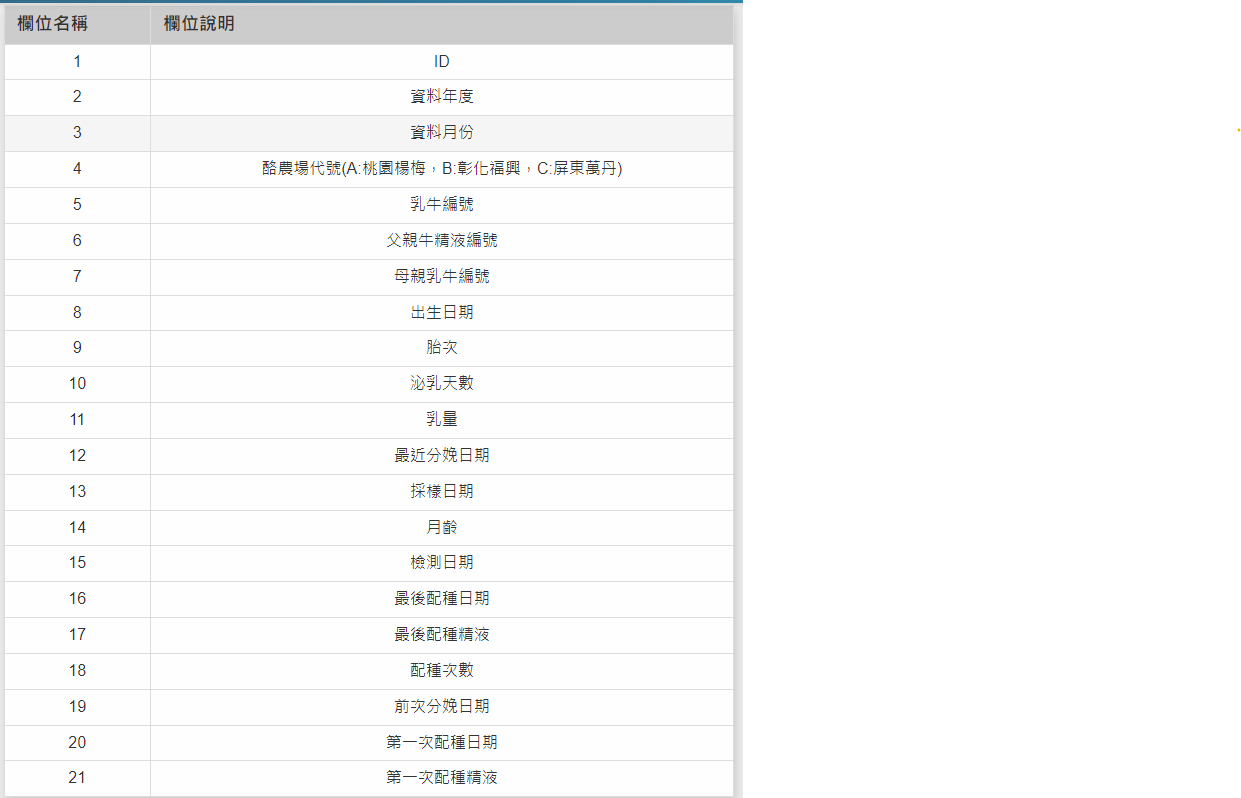


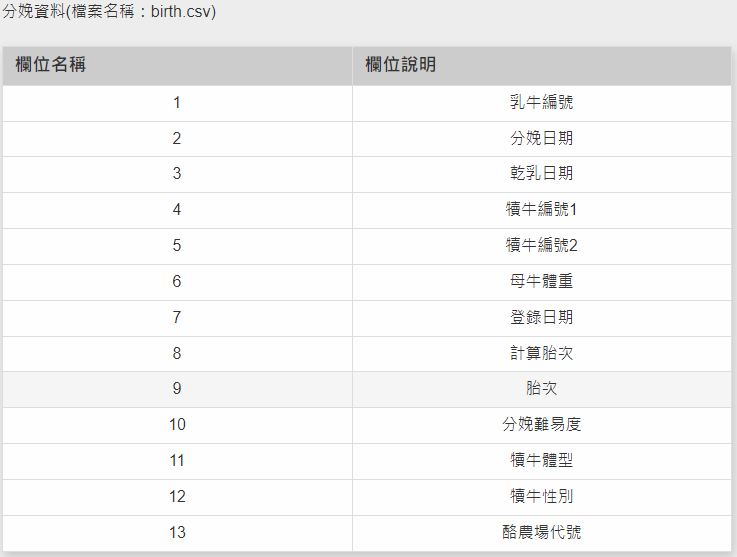

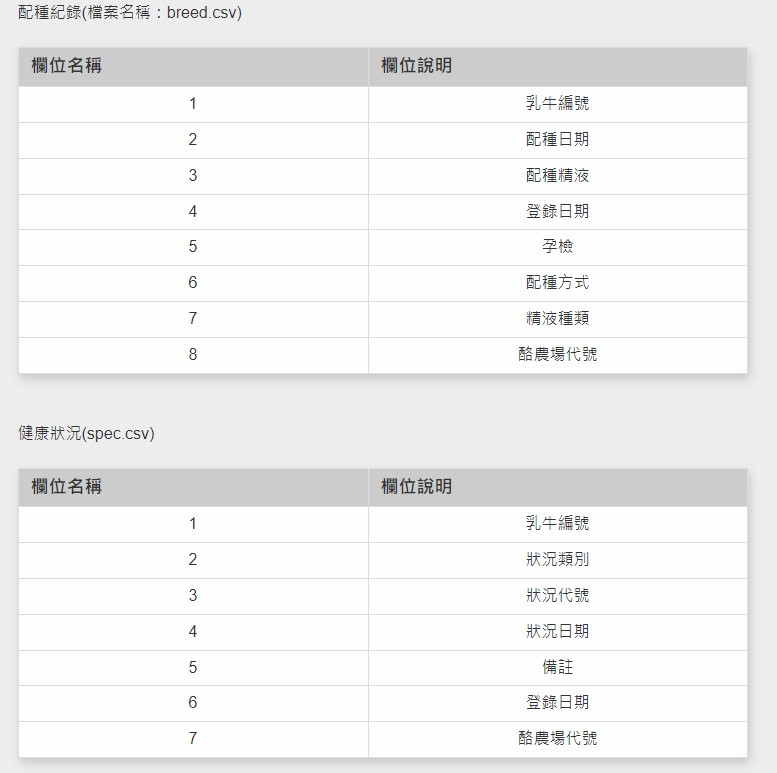

表跟feature實在有點多，從官網上面提供的資料我想先找一些我覺得可以用到的feature
現階段我想先找的是

1.資料年度/月份 (我記得牛乳分泌在夏天冬天會不一樣，會受到當時氣溫干擾)

2.牛牛的父母 (基因層面)

3.地點 (不同農場的飼養方法我想可能不一樣)

4.分娩相關資訊

從column 來看的話是2,3,4,5,6,7,9,10,11,14,18,21


生成第一版的訓練用資料和submit資料~~

In [9]:
train_data=pd.DataFrame(data=report,columns=["1","2","3","4","5","6","7","9","10","11","12","14","18","19","21",'season','year','Sick','weight',"days","borns","delmonth"])
sub_data=pd.DataFrame(data=sub_data,columns=["1","2","3","4","5","6","7","9","10","12","14","18","19","21",'season','year','Sick','weight',"days","borns","delmonth"])
train_data=train_data.rename(columns={
    "1":"ID",
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "11":"乳量",
    "12":"最近分娩日期",
    "14":"月齡",
    "18":"配種次數",
    "19":"前次分娩日期",
    "21":"第一次配種精液",
})
submit_data=sub_data.rename(columns={
    "1":"ID",
    "2":"資料年度",
    "3":"資料月份",
    "4":"酪農場代號",
    "5":"乳牛編號",
    "6":"父親牛精液編號",
    "7":"母親乳牛編號",
    "9":"胎次",
    "10":"泌乳天數",
    "12":"最近分娩日期",
    "14":"月齡",
    "18":"配種次數",
    "19":"前次分娩日期",
    "21":"第一次配種精液",
})


train_data.head(10)



,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,乳量,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,1,2013,3,A,52612,507H7173,96040545,1,78.0,29.4,...,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2013,4,A,52612,507H7173,96040545,1,107.0,27.8,...,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2013,5,A,52612,507H7173,96040545,1,140.0,9.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2013,6,A,52612,507H7173,96040545,1,175.0,13.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2013,7,A,52612,507H7173,96040545,1,210.0,13.2,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2013,8,A,52612,507H7173,96040545,1,239.0,15.7,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2013,10,A,52612,507H7173,96040545,1,281.0,12.8,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2013,11,A,52612,507H7173,96040545,1,311.0,8.8,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2013,12,A,52612,507H7173,96040545,1,337.0,9.0,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2014,1,A,52612,507H7173,96040545,1,370.0,5.0,...,4,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

submit_data.head(10)

,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,最近分娩日期,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,480,2019,1,A,52631,501H9952,97040152,4,435.0,2017/11/1 00:00,...,6,2016/8/4 00:00,614HO07276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,742,2019,2,A,52640,501H9952,96040567,4,13.0,2019/1/29 00:00,...,0,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,743,2019,3,A,52640,501H9952,96040567,4,35.0,2019/1/29 00:00,...,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,744,2019,4,A,52640,501H9952,96040567,4,70.0,2019/1/29 00:00,...,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,745,2019,5,A,52640,501H9952,96040567,4,98.0,2019/1/29 00:00,...,1,2017/6/17 00:00,551HO00695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,793,2019,2,A,52641,614H5010,97040119,6,279.0,2018/5/8 00:00,...,1,2017/7/4 00:00,507HO12236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,794,2019,1,A,52641,614H5010,97040119,6,247.0,2018/5/8 00:00,...,1,2017/7/4 00:00,507HO12236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,800,2019,5,A,52641,614H5010,97040119,7,12.0,2019/4/25 00:00,...,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,801,2019,6,A,52641,614H5010,97040119,7,39.0,2019/4/25 00:00,...,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,802,2019,7,A,52641,614H5010,97040119,7,67.0,2019/4/25 00:00,...,0,2018/5/8 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#研究一下分娩日期與檢測日期的差距與乳量的關係


In [11]:
submit_data.isna().sum()

ID             0
資料年度           0
資料月份           0
酪農場代號          0
乳牛編號           0
父親牛精液編號      247
母親乳牛編號       329
胎次             0
泌乳天數           0
最近分娩日期         0
月齡             0
配種次數           0
前次分娩日期      1751
第一次配種精液      403
season      4263
year        4263
Sick        4263
weight      4263
days        4263
borns       4263
delmonth    4263
dtype: int64

In [12]:
 
train_data=train_data.dropna(subset=["最近分娩日期"])


In [13]:
from datetime import datetime 
train_data.reset_index(inplace=True)
for i in range(len(train_data["最近分娩日期"])):
  day=datetime.strptime(train_data["最近分娩日期"][i],"%Y/%m/%d %H:%M")
  if train_data["資料年度"][i]>=day.year :
    if train_data["資料年度"][i]==day.year:
      train_data["delmonth"][i]=train_data["資料月份"][i]-day.month
    elif train_data["資料年度"][i]>day.year:
      train_data["delmonth"][i]=(train_data["資料年度"][i]-day.year-1)*12+(12-day.month+train_data["資料月份"][i])
  else:
    print(f"there is an error in i = {i} !")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [14]:
train_data.head(10)

,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,1,2013,3,A,52612,507H7173,96040545,1,78.0,...,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1,2,2013,4,A,52612,507H7173,96040545,1,107.0,...,1,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2,3,2013,5,A,52612,507H7173,96040545,1,140.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,4.0
3,3,4,2013,6,A,52612,507H7173,96040545,1,175.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,4,5,2013,7,A,52612,507H7173,96040545,1,210.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5,5,6,2013,8,A,52612,507H7173,96040545,1,239.0,...,2,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,7.0
6,6,7,2013,10,A,52612,507H7173,96040545,1,281.0,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,9.0
7,7,8,2013,11,A,52612,507H7173,96040545,1,311.0,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,10.0
8,8,9,2013,12,A,52612,507H7173,96040545,1,337.0,...,3,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,11.0
9,9,10,2014,1,A,52612,507H7173,96040545,1,370.0,...,4,NaN,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,12.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


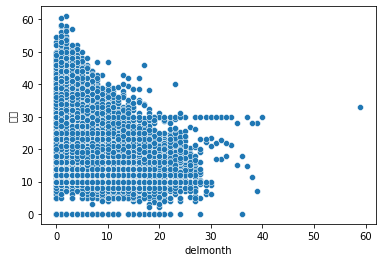

In [15]:
sns.scatterplot(x="delmonth", y="乳量",data=train_data)

In [16]:
submit_data.reset_index(inplace=True)
for i in range(len(submit_data["最近分娩日期"])):
  day=datetime.strptime(submit_data["最近分娩日期"][i],"%Y/%m/%d %H:%M")
  if submit_data["資料年度"][i]>=day.year :
    if submit_data["資料年度"][i]==day.year:
      submit_data["delmonth"][i]=submit_data["資料月份"][i]-day.month
    elif submit_data["資料年度"][i]>day.year:
      submit_data["delmonth"][i]=(submit_data["資料年度"][i]-day.year-1)*12+(12-day.month+submit_data["資料月份"][i])
  else:
    print(f"there is an error in i = {i} !")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


再見了，乳量那邊如果是沒有資料或是為0的就等於沒有用

In [17]:
train_data = train_data.dropna(subset=["乳量"])
train_data.reset_index(inplace=True)

In [18]:
for i in range(len(train_data["乳量"])):
  if train_data["乳量"][i] == 0:
    train_data=train_data.drop([i]) #把乳量為0的那排直接槓掉,axis=0


# train_data.isna().sum()

In [19]:
train_data["year"]=train_data["資料年度"]
submit_data["year"]=submit_data["資料年度"]

In [20]:
train_data.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,2.0
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,3.0
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,4.0
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,5.0
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,6.0
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,7.0
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,9.0
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,10.0
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,NaN,2013,NaN,NaN,NaN,NaN,11.0
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,4,NaN,501H8784,NaN,2014,NaN,NaN,NaN,NaN,12.0


處理缺失值之前，我想多加一點資訊
我想增加像是當時是否有疾病或是其他的(要從其他地方找)

In [21]:
#從SPEC 表裡面找一下，牛牛是否有生病

from datetime import datetime 
#1999/8/24  12:00:00 AM 日期是長這個,等等拿來拆開
#先找說這隻牛有沒有生病，如果spec裡面有紀錄的話在檢查時間有沒有對上。如果有的話就給1，沒有給0
for i in range(len(spec)):
  day=datetime.strptime(spec["4"][i],"%Y/%m/%d %H:%M")
  if len(train_data.index[train_data["乳牛編號"] == spec["1"][i]])>0:
    for j in train_data.index[train_data["乳牛編號"] == spec["1"][i]]:
      if train_data["year"][j] == day.year and train_data['資料月份'][j] == day.month and train_data["酪農場代號"][j]==spec["7"][i]:
        train_data["Sick"][j] = 1
  if len(submit_data.index[submit_data["乳牛編號"] == spec["1"][i]])>0:
    for j in submit_data.index[submit_data['乳牛編號'] == spec["1"][i]]:
      if submit_data["year"][j] == day.year and submit_data["資料月份"][j] == day.month and submit_data["酪農場代號"][j]==spec["7"][i]:
        submit_data["Sick"][j] = 1

train_data["Sick"].fillna(0,inplace=True) #當初沒有配對到的應該就是產乳時是健康的
submit_data["Sick"].fillna(0,inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


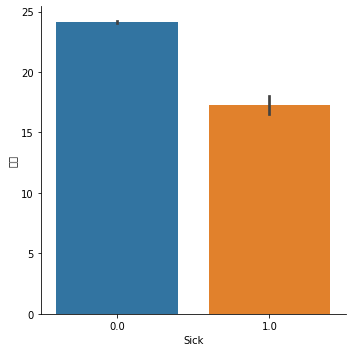

In [22]:
#看看健康對於產乳量是否有差距
sns.catplot(
    data=train_data, kind="bar",
    x="Sick", y="乳量"
)

In [23]:
#考慮每隻牛牛重量不同，有人身強體壯可以產很多乳，有些瘦弱可能沒那麼多能量

avgw = birth["6"].median()
birth["6"] = birth["6"].fillna(avgw)
for i in range(len(birth)):
  if len(train_data.index[train_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in train_data.index[train_data["乳牛編號"] == birth["1"][i]]:
      train_data.loc[j,"weight"] = round(birth["6"][i],2)

  if len(submit_data.index[submit_data["乳牛編號"] == birth["1"][i]]) > 0:
    for j in submit_data.index[submit_data["乳牛編號"] == birth["1"][i]]:
      submit_data.loc[j,"weight"] = round(birth["6"][i],2)
avgw = birth["6"].median()
train_data["weight"].fillna(avgw,inplace=True)
submit_data["weight"].fillna(avgw,inplace=True)


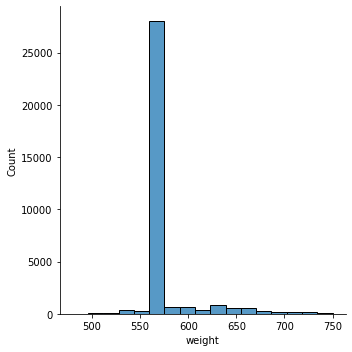

In [24]:
sns.displot(
    train_data, x="weight"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


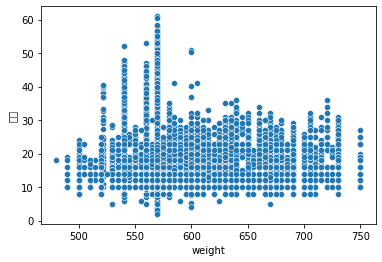

In [25]:
sns.scatterplot(x="weight", y="乳量",data=train_data)

In [26]:
train_data.isna().sum()

level_0         0
index           0
ID              0
資料年度            0
資料月份            0
酪農場代號           0
乳牛編號            0
父親牛精液編號       628
母親乳牛編號       3245
胎次              0
泌乳天數            0
乳量              0
最近分娩日期          0
月齡              0
配種次數            0
前次分娩日期      15631
第一次配種精液      1017
season      33185
year            0
Sick            0
weight          0
days        33185
borns       33185
delmonth        0
dtype: int64

In [27]:
#處理一下月份~~變成春夏秋冬之後在OHE比較好。單純用月份的話是數字可能會有上下關係
train_data.reset_index(inplace=True,drop=True)
for i in range(len(train_data)):
  if train_data["資料月份"][i] >=3 and train_data["資料月份"][i] <= 5:
    train_data["season"][i] = "Spring"
  elif train_data["資料月份"][i] >=6 and train_data["資料月份"][i] <= 8:
    train_data["season"][i] = "Summer"
  elif train_data["資料月份"][i] >=9 and train_data["資料月份"][i] <= 11:
    train_data["season"][i] = "Autumn"
  else :
    train_data["season"][i] = "Winter"
for i in range(len(submit_data)):
  if submit_data["資料月份"][i] >=3 and submit_data["資料月份"][i] <= 5:
    submit_data["season"][i] = "Spring"
  elif submit_data["資料月份"][i] >=6 and submit_data["資料月份"][i] <= 8:
    submit_data["season"][i] = "Summer"
  elif submit_data["資料月份"][i] >=9 and submit_data["資料月份"][i] <= 11:
    submit_data["season"][i] = "Autumn"
  else :
    submit_data["season"][i] = "Winter"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
train_data.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,2.0
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,3.0
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,4.0
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,5.0
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,6.0
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,7.0
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN,9.0
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN,10.0
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Winter,2013,0.0,570.0,NaN,NaN,11.0
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,4,NaN,501H8784,Winter,2014,0.0,570.0,NaN,NaN,12.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37226 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36786 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22580 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 34399 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0,

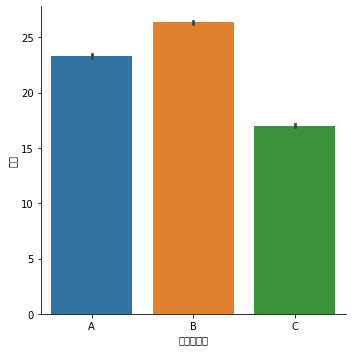

In [29]:
sns.catplot(
    data=train_data, kind="bar",
    x="酪農場代號", y="乳量"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


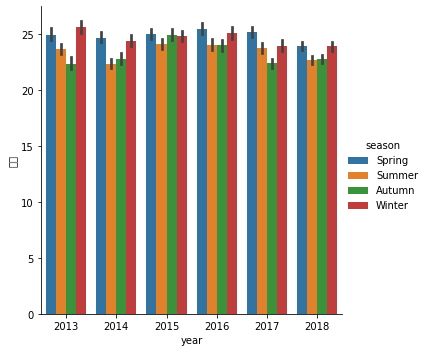

In [30]:
sns.catplot(
    data=train_data, kind="bar",
    x="year", y="乳量", hue="season"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0, flags=flags)


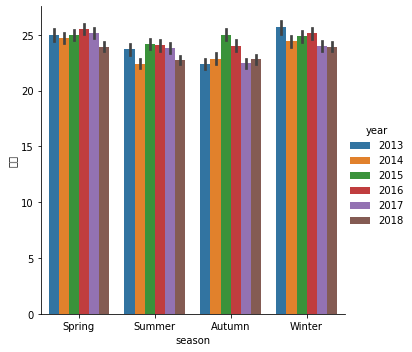

In [31]:
sns.catplot(
    data=train_data, kind="bar",
    x="season", y="乳量", hue="year"
)

In [32]:
submit_data.head(10)

,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,480,2019,1,A,52631,501H9952,97040152,4,435.0,...,6,2016/8/4 00:00,614HO07276,Winter,2019,0.0,570.0,NaN,NaN,14.0
1,1,742,2019,2,A,52640,501H9952,96040567,4,13.0,...,0,2017/6/17 00:00,551HO00695,Winter,2019,0.0,570.0,NaN,NaN,1.0
2,2,743,2019,3,A,52640,501H9952,96040567,4,35.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,NaN,NaN,2.0
3,3,744,2019,4,A,52640,501H9952,96040567,4,70.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,NaN,NaN,3.0
4,4,745,2019,5,A,52640,501H9952,96040567,4,98.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,1.0,570.0,NaN,NaN,4.0
5,5,793,2019,2,A,52641,614H5010,97040119,6,279.0,...,1,2017/7/4 00:00,507HO12236,Winter,2019,0.0,570.0,NaN,NaN,9.0
6,6,794,2019,1,A,52641,614H5010,97040119,6,247.0,...,1,2017/7/4 00:00,507HO12236,Winter,2019,0.0,570.0,NaN,NaN,8.0
7,7,800,2019,5,A,52641,614H5010,97040119,7,12.0,...,0,2018/5/8 00:00,NaN,Spring,2019,0.0,570.0,NaN,NaN,1.0
8,8,801,2019,6,A,52641,614H5010,97040119,7,39.0,...,0,2018/5/8 00:00,NaN,Summer,2019,0.0,570.0,NaN,NaN,2.0
9,9,802,2019,7,A,52641,614H5010,97040119,7,67.0,...,0,2018/5/8 00:00,NaN,Summer,2019,0.0,570.0,NaN,NaN,3.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)


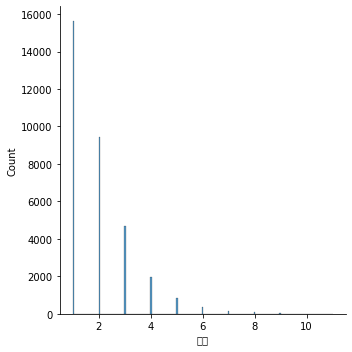

In [33]:
sns.displot(
    train_data, x="胎次"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text

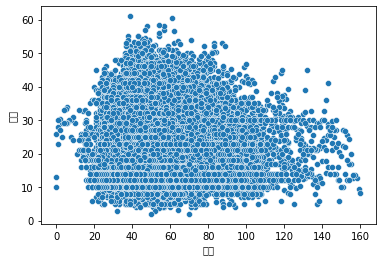

In [34]:
sns.scatterplot(x="月齡", y="乳量",data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)


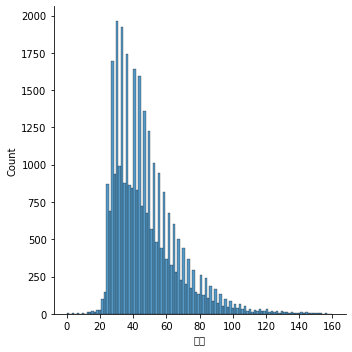

In [35]:
sns.displot(
    train_data, x="月齡"
)

In [36]:
B=train_data["月齡"]**(1/5)
#B=np.log1p(train_data["泌乳天數"])
skewness=round(B.skew(),2)
kurtosis=round(B.kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

偏度(Skewness):0.3 , 峰度(Kurtosis):3.17


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40801 missing from current font.
  font.set_text(s, 0, flags=flags)


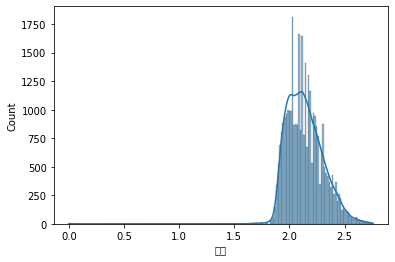

In [37]:
sns.histplot(B,kde=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)


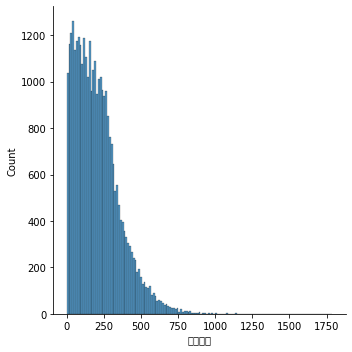

In [38]:
sns.displot(
    train_data, x="泌乳天數"
)

In [39]:

skewness=round(train_data["泌乳天數"].skew(),2)
kurtosis=round(train_data["泌乳天數"].kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")


偏度(Skewness):1.12 , 峰度(Kurtosis):1.97


#Pre-processing log1p轉化

In [40]:
# A=np.log1p(train_data["泌乳天數"])
# skewness=round(A.skew(),2)
# kurtosis=round(A.kurt(),2)
# print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

In [41]:
# sns.histplot(A,kde=True)

#Pre-processing 平方根轉化

In [42]:
B=train_data["泌乳天數"]**(1/3)
skewness=round(B.skew(),2)
kurtosis=round(B.kurt(),2)
print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

偏度(Skewness):-0.26 , 峰度(Kurtosis):-0.32


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27852 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_te

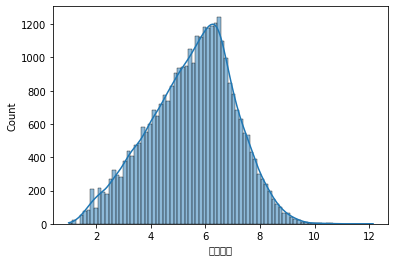

In [43]:
sns.histplot(B,kde=True)

#Pre-processing conbox轉化

In [44]:
# from scipy.stats import boxcox
# C, lam = boxcox(train_data["泌乳天數"])
# C = pd.DataFrame(C, columns=['泌乳天數'])['泌乳天數']
# # skewness 與 kurtosis
# skewness = round(C.skew(), 2)
# kurtosis = round(C.kurt(), 2)
# print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")


In [45]:
# 繪製分布圖
# sns.histplot(C, kde=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text

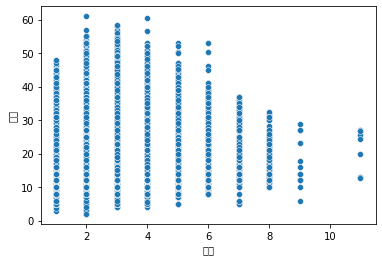

In [46]:
sns.scatterplot(x="胎次", y="乳量",data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32974 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text

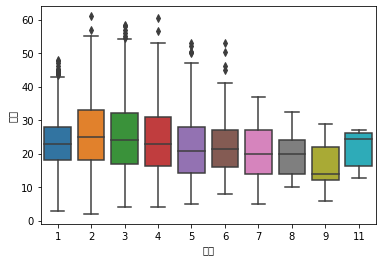

In [47]:
#sns.scatterplot(x="胎次", y="乳量",data=train_data)
sns.boxplot(x="胎次", y="乳量",
            data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_te

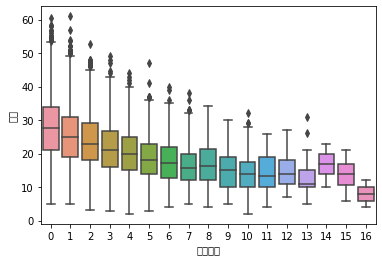

In [48]:
sns.boxplot(x="配種次數", y="乳量",
            data=train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0, flags=flags)


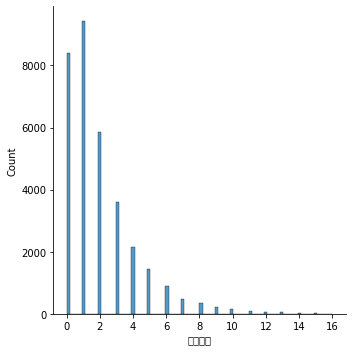

In [49]:
sns.displot(
    train_data, x="配種次數"
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31278 missing from current font.
  font.set_te

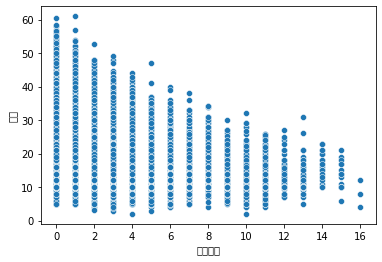

In [50]:
sns.scatterplot(x="配種次數", y="乳量",data=train_data)

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33185 entries, 0 to 33184
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   33185 non-null  int64  
 1   index     33185 non-null  int64  
 2   ID        33185 non-null  int64  
 3   資料年度      33185 non-null  int64  
 4   資料月份      33185 non-null  int64  
 5   酪農場代號     33185 non-null  object 
 6   乳牛編號      33185 non-null  int64  
 7   父親牛精液編號   32557 non-null  object 
 8   母親乳牛編號    29940 non-null  object 
 9   胎次        33185 non-null  int64  
 10  泌乳天數      33185 non-null  float64
 11  乳量        33185 non-null  float64
 12  最近分娩日期    33185 non-null  object 
 13  月齡        33185 non-null  int64  
 14  配種次數      33185 non-null  int64  
 15  前次分娩日期    17554 non-null  object 
 16  第一次配種精液   32168 non-null  object 
 17  season    33185 non-null  object 
 18  year      33185 non-null  int64  
 19  Sick      33185 non-null  float64
 20  weight    33185 non-null  fl

In [52]:
train_data.isna().sum()

level_0         0
index           0
ID              0
資料年度            0
資料月份            0
酪農場代號           0
乳牛編號            0
父親牛精液編號       628
母親乳牛編號       3245
胎次              0
泌乳天數            0
乳量              0
最近分娩日期          0
月齡              0
配種次數            0
前次分娩日期      15631
第一次配種精液      1017
season          0
year            0
Sick            0
weight          0
days        33185
borns       33185
delmonth        0
dtype: int64

In [53]:
train_data.dropna(subset=["泌乳天數"],inplace=True)

In [54]:
submit_data.dropna(subset=["泌乳天數"],inplace=True)

In [55]:

# for i in range(len(train_data["泌乳天數"])):
#   if train_data['泌乳天數'][i] <=100:
#     train_data['days'][i] = 0
#   elif train_data['泌乳天數'][i]>=101 and train_data['泌乳天數'][i] <=200 :
#     train_data['days'][i] = 1
#   elif train_data['泌乳天數'][i] >=201 and train_data['泌乳天數'][i] <=300:
#     train_data['days'][i] = 2
#   else:
#     train_data['days'][i] = 3
#   if int(train_data["胎次"][i]) <=2:
#     train_data["borns"][i] = 0
#   elif int(train_data['胎次'][i]) >=7:
#     train_data['borns'][i] = 2
#   else:
#     train_data['borns'][i] = 1


In [56]:
# for i in range(len(submit_data['泌乳天數'])):
#     if int(submit_data['泌乳天數'][i]) <=100:
#         submit_data['days'][i] = 0
#     elif int(submit_data['泌乳天數'][i]) >=101 and int(submit_data['泌乳天數'][i]) <=200 :
#         submit_data['days'][i] = 1
#     elif int(submit_data['泌乳天數'][i]) >=201 and int(submit_data['泌乳天數'][i]) <=300:
#         submit_data['days'][i] = 2
#     else:
#         submit_data['泌乳天數'][i] = 3
#     if int(submit_data['胎次'][i]) <=2:
#         submit_data['borns'][i] = 0
#     elif int(submit_data['胎次'][i]) >=7:
#         submit_data['borns'][i] = 2
#     else:
#       submit_data['borns'][i] = 1


In [57]:
y = train_data["乳量"]
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33180    20.0
33181    21.0
33182    19.0
33183    12.0
33184    10.0
Name: 乳量, Length: 33185, dtype: float64

In [58]:
# mod=train_data["母親乳牛編號"].mode()
# train_data["母親乳牛編號"].fillna(mod,inplace=True)
# submit_data["母親乳牛編號"].fillna(mod,inplace=True)

In [59]:
# train_data["母親乳牛編號"]=train_data["母親乳牛編號"].astype(str)
# submit_data["母親乳牛編號"]=submit_data["母親乳牛編號"].astype(str)


In [60]:
X_train=train_data.copy()
X_sub=submit_data.copy()

In [61]:
X_train.head(10)

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,2.0
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,3.0
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Spring,2013,0.0,570.0,NaN,NaN,4.0
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,5.0
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,6.0
5,5,5,6,2013,8,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,NaN,NaN,7.0
6,6,6,7,2013,10,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN,9.0
7,7,7,8,2013,11,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Autumn,2013,0.0,570.0,NaN,NaN,10.0
8,8,8,9,2013,12,A,52612,507H7173,96040545,1,...,3,NaN,501H8784,Winter,2013,0.0,570.0,NaN,NaN,11.0
9,9,9,10,2014,1,A,52612,507H7173,96040545,1,...,4,NaN,501H8784,Winter,2014,0.0,570.0,NaN,NaN,12.0


#處理胎次&配種次數


In [62]:
DD=[]
BB=[]
X_train.reset_index(inplace=True, drop=True)

for i in range(len(X_train["配種次數"])):
  if X_train["配種次數"][i] <= 2:
    DD.append(0)
  elif X_train["配種次數"][i] >=3 and X_train["配種次數"][i] <=6:
    DD.append(1)
  else:
    DD.append(2)
  if X_train["胎次"][i] <= 5:
    BB.append(0)
  elif X_train["胎次"][i] >=6 and X_train["胎次"][i] <=7:
    BB.append(1)
  else:
    BB.append(2)
  
X_train["days"]=DD
X_train["borns"]=BB

In [63]:
X_train

,level_0,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,0,1,2013,3,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,0,0,2.0
1,1,1,2,2013,4,A,52612,507H7173,96040545,1,...,1,NaN,501H8784,Spring,2013,0.0,570.0,0,0,3.0
2,2,2,3,2013,5,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Spring,2013,0.0,570.0,0,0,4.0
3,3,3,4,2013,6,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,0,0,5.0
4,4,4,5,2013,7,A,52612,507H7173,96040545,1,...,2,NaN,501H8784,Summer,2013,0.0,570.0,0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33180,37511,37512,37513,2014,1,C,93184912,14H1999,85171537.0,8,...,0,2012/11/16 00:00,NaN,Winter,2014,0.0,725.0,0,2,0.0
33181,37512,37513,37514,2014,5,C,93184912,14H1999,85171537.0,8,...,0,2012/11/16 00:00,NaN,Spring,2014,0.0,725.0,0,2,4.0
33182,37513,37514,37515,2014,6,C,93184912,14H1999,85171537.0,8,...,0,2012/11/16 00:00,NaN,Summer,2014,0.0,725.0,0,2,5.0
33183,37514,37515,37516,2014,7,C,93184912,14H1999,85171537.0,8,...,0,2012/11/16 00:00,NaN,Summer,2014,0.0,725.0,0,2,6.0


In [64]:
DD=[]
BB=[]
X_sub.reset_index(inplace=True, drop=True)

for i in range(len(X_sub["配種次數"])):
  if X_sub["配種次數"][i] <= 2:
    DD.append(0)
  elif X_sub["配種次數"][i] >=3 and X_sub["配種次數"][i] <=6:
    DD.append(1)
  else:
    DD.append(2)
  if X_sub["胎次"][i] <= 5:
    BB.append(0)
  elif X_sub["胎次"][i] >=6 and X_sub["胎次"][i] <=7:
    BB.append(1)
  else:
    BB.append(2)

X_sub["days"]=DD
X_sub["borns"]=BB

In [65]:
X_sub

,index,ID,資料年度,資料月份,酪農場代號,乳牛編號,父親牛精液編號,母親乳牛編號,胎次,泌乳天數,...,配種次數,前次分娩日期,第一次配種精液,season,year,Sick,weight,days,borns,delmonth
0,0,480,2019,1,A,52631,501H9952,97040152,4,435.0,...,6,2016/8/4 00:00,614HO07276,Winter,2019,0.0,570.0,1,0,14.0
1,1,742,2019,2,A,52640,501H9952,96040567,4,13.0,...,0,2017/6/17 00:00,551HO00695,Winter,2019,0.0,570.0,0,0,1.0
2,2,743,2019,3,A,52640,501H9952,96040567,4,35.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,0,0,2.0
3,3,744,2019,4,A,52640,501H9952,96040567,4,70.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,0.0,570.0,0,0,3.0
4,4,745,2019,5,A,52640,501H9952,96040567,4,98.0,...,1,2017/6/17 00:00,551HO00695,Spring,2019,1.0,570.0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4258,37481,2019,6,C,6187446,001HO11511,4170458.0,1,15.0,...,0,NaN,001HO12901,Summer,2019,0.0,540.0,0,0,0.0
4259,4259,37482,2019,6,C,6187448,001HO11511,3172306.0,1,22.0,...,0,NaN,NaN,Summer,2019,0.0,490.0,0,0,0.0
4260,4260,37483,2019,6,C,6187449,001HO11511,2176835.0,1,21.0,...,0,NaN,NaN,Summer,2019,0.0,540.0,0,0,0.0
4261,4261,37484,2019,7,C,6187449,001HO11511,2176835.0,1,51.0,...,0,NaN,NaN,Summer,2019,0.0,540.0,0,0,1.0


In [66]:
all=pd.concat([X_train,X_sub])


In [67]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37448 entries, 0 to 4262
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level_0   33185 non-null  float64
 1   index     37448 non-null  int64  
 2   ID        37448 non-null  object 
 3   資料年度      37448 non-null  object 
 4   資料月份      37448 non-null  object 
 5   酪農場代號     37448 non-null  object 
 6   乳牛編號      37448 non-null  object 
 7   父親牛精液編號   36573 non-null  object 
 8   母親乳牛編號    33874 non-null  object 
 9   胎次        37448 non-null  object 
 10  泌乳天數      37448 non-null  object 
 11  乳量        33185 non-null  float64
 12  最近分娩日期    37448 non-null  object 
 13  月齡        37448 non-null  object 
 14  配種次數      37448 non-null  object 
 15  前次分娩日期    20066 non-null  object 
 16  第一次配種精液   36028 non-null  object 
 17  season    37448 non-null  object 
 18  year      37448 non-null  object 
 19  Sick      37448 non-null  float64
 20  weight    37448 non-null  flo

In [68]:
all.isna().sum()

level_0      4263
index           0
ID              0
資料年度            0
資料月份            0
酪農場代號           0
乳牛編號            0
父親牛精液編號       875
母親乳牛編號       3574
胎次              0
泌乳天數            0
乳量           4263
最近分娩日期          0
月齡              0
配種次數            0
前次分娩日期      17382
第一次配種精液      1420
season          0
year            0
Sick            0
weight          0
days            0
borns           0
delmonth        0
dtype: int64

#處理月齡

In [69]:
A=all["月齡"]**(1/3)
all["月齡"]=A
# skewness=round(B.skew(),2)
# kurtosis=round(B.kurt(),2)
# print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

#處理泌乳天數


In [70]:
B=all["泌乳天數"]**(1/3)
all["泌乳天數"]=B
#skewness=round(B.skew(),2)
#kurtosis=round(B.kurt(),2)
#print(f"偏度(Skewness):{skewness} , 峰度(Kurtosis):{kurtosis}")

#處理配種次數


#處理胎次


In [71]:
all.isna().sum()

level_0      4263
index           0
ID              0
資料年度            0
資料月份            0
酪農場代號           0
乳牛編號            0
父親牛精液編號       875
母親乳牛編號       3574
胎次              0
泌乳天數            0
乳量           4263
最近分娩日期          0
月齡              0
配種次數            0
前次分娩日期      17382
第一次配種精液      1420
season          0
year            0
Sick            0
weight          0
days            0
borns           0
delmonth        0
dtype: int64

In [72]:
print(len(all["乳牛編號"].value_counts()))
all["乳牛編號"].value_counts()

1988


98127843    68
99051771    67
98051970    67
122630      67
99183209    67
            ..
2051977      1
97124164     1
97124161     1
1051817      1
6187451      1
Name: 乳牛編號, Length: 1988, dtype: int64

In [73]:
print(len(all["母親乳牛編號"].value_counts()))
all["母親乳牛編號"].value_counts()

1265


外購            2226
進口             436
96174165.0     159
95040473       149
97171306.0     125
              ... 
98040693         1
98040671         1
94040405         1
96040525         1
2176823.0        1
Name: 母親乳牛編號, Length: 1265, dtype: int64

In [74]:

all["母親乳牛編號"].fillna("外購",inplace=True)
all["母親乳牛編號"]=all["母親乳牛編號"].astype(str)

In [75]:
all.isna().sum()

level_0      4263
index           0
ID              0
資料年度            0
資料月份            0
酪農場代號           0
乳牛編號            0
父親牛精液編號       875
母親乳牛編號          0
胎次              0
泌乳天數            0
乳量           4263
最近分娩日期          0
月齡              0
配種次數            0
前次分娩日期      17382
第一次配種精液      1420
season          0
year            0
Sick            0
weight          0
days            0
borns           0
delmonth        0
dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
labelencodder=LabelEncoder()

all_copy=all.copy()

all_copy["酪農場代號"]=labelencodder.fit_transform(all_copy["酪農場代號"])
all_copy["母親乳牛編號"]=labelencodder.fit_transform(all_copy["母親乳牛編號"])
all_copy["乳牛編號"]=labelencodder.fit_transform(all_copy["乳牛編號"])
all_copy["Sick"]=labelencodder.fit_transform(all_copy["Sick"])
all_copy["season"]=labelencodder.fit_transform(all_copy["season"])
all_copy["year"]=labelencodder.fit_transform(all_copy["year"])
all_copy["胎次"]=labelencodder.fit_transform(all_copy["胎次"])
all_copy["配種次數"]=labelencodder.fit_transform(all_copy["配種次數"])
#all=all["酪農場代號","乳牛編號","母親乳牛編號","Sick","胎次","泌乳天數","月齡","配種次數"]
# X_train=all[:len(X_train)]
# X_sub=all[len(X_train)::]

In [77]:
all_copy=all_copy[["酪農場代號","乳牛編號","母親乳牛編號","Sick","泌乳天數","月齡","delmonth","胎次","配種次數","season","year"]] #,"borns","days"

In [78]:
# import torch
# all=pd.get_dummies(all,columns=["酪農場代號","乳牛編號","母親乳牛編號","Sick"])


# X_train=all[:len(X_train)]
# X_sub=all[len(X_train)::]
#把要的類別轉換成One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories="auto")

ohe.fit(all_copy)

X_train=all_copy[0:len(X_train)]
X_sub=all_copy[len(X_train)::]

X=ohe.transform(X_train).toarray()
X_test=ohe.transform(X_sub).toarray()


In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [80]:
from keras import backend as k
def error(y_pred,y_true):
  return k.sqrt(k.mean(k.square(y_pred - y_true)))

In [81]:
dim=X.shape[1]
print(dim)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


4354
(26548, 4354)
(6637, 4354)
(26548,)
(6637,)


In [82]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam



model=Sequential()
model.add(Dense(2048,input_dim=dim,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=error,optimizer=Adam(lr=1e-3),metrics=[error])




/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [83]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=15,verbose=1)

Epoch 1/15
208/208 [==============================] - 4s 8ms/step - loss: 6.7427 - error: 6.7376 - val_loss: 5.6233 - val_error: 5.6241
Epoch 2/15
208/208 [==============================] - 1s 6ms/step - loss: 5.0501 - error: 5.0516 - val_loss: 5.2136 - val_error: 5.2142
Epoch 3/15
208/208 [==============================] - 1s 6ms/step - loss: 4.0595 - error: 4.0594 - val_loss: 5.2843 - val_error: 5.2847
Epoch 4/15
208/208 [==============================] - 1s 6ms/step - loss: 3.2170 - error: 3.2153 - val_loss: 5.0446 - val_error: 5.0437
Epoch 5/15
208/208 [==============================] - 1s 6ms/step - loss: 2.5779 - error: 2.5768 - val_loss: 5.0608 - val_error: 5.0606
Epoch 6/15
208/208 [==============================] - 1s 7ms/step - loss: 2.1948 - error: 2.1936 - val_loss: 5.0497 - val_error: 5.0493
Epoch 7/15
208/208 [==============================] - 1s 6ms/step - loss: 1.9703 - error: 1.9703 - val_loss: 5.0350 - val_error: 5.0347
Epoch 8/15
208/208 [============================

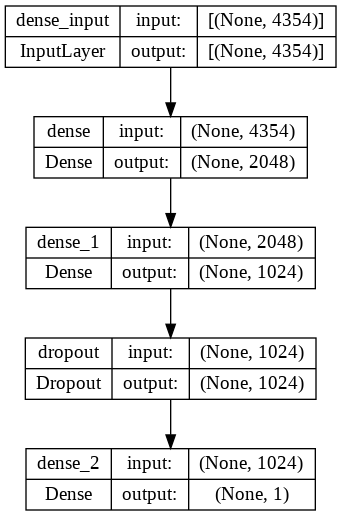

In [84]:
from keras.utils import plot_model

plot_model(model,to_file='model.png',show_shapes=True)

134/134 [==============================] - 0s 2ms/step


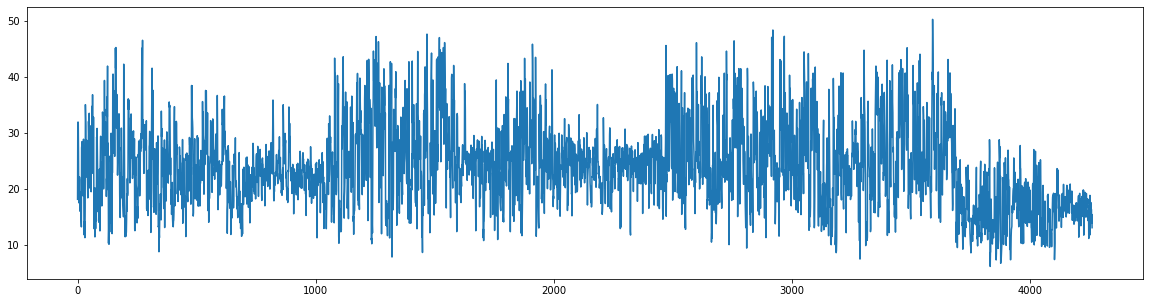

In [85]:
prediction=model.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [86]:
sub['1']=prediction
sub.to_csv('prediction1.csv',index=False)

In [87]:
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 300)

In [88]:
X_sub[:][3500:]

,酪農場代號,乳牛編號,母親乳牛編號,Sick,泌乳天數,月齡,delmonth,胎次,配種次數,season,year
3500,1,847,81,0,7.312383,3.779763,13.0,1,2,1,6
3501,1,850,1263,0,4.081655,3.174802,2.0,0,1,3,6
3502,1,850,1263,0,5.052774,3.239612,4.0,0,2,1,6
3503,1,850,1263,0,4.687548,3.207534,3.0,0,2,3,6
3504,1,850,1263,0,5.778997,3.301927,6.0,0,2,1,6
3505,1,850,1263,0,5.462556,3.271066,5.0,0,2,1,6
3506,1,850,1263,0,6.036811,3.332222,7.0,0,2,2,6
3507,1,850,1263,0,6.299605,3.361975,8.0,0,3,2,6
3508,1,851,1263,0,6.502957,3.174802,9.0,0,1,3,6
3509,1,851,1263,0,6.214465,3.141381,8.0,0,1,3,6
